# Bienvenidos a la Clase 7 de ICDP

En esta clase continuamos con el uso de la librería pandas para creación y manejo de datasets, además de trabajar con las diferentes estructuras de datos, manejar y conocer las diferentes opciones en cada tipo de estructura, sus coincidencias y diferencias.

In [1]:
import pandas as pd

En esta clase usaremos el conjunto de datos titanic almacenado como CSV. Los datos constan de las siguientes columnas de datos:

columna | descripcion
------ | ----------
`PassengerId` |  Id de cada pasajero.
`Survived` |  esta característica tiene valor 0 y 1. 0  para no sobrevivido y 1 para sobrevivido.
`Pclass` |  Hay 3 
`clases` |  Clase 1, Clase 2 y Clase 3.
`Name` |  Nombre del pasajero.
`Sex` |  Género del pasajero.
`Age` |  Edad del pasajero.
`SibSp` |  Indicación de que el pasajero tiene hermanos y cónyuge.
`Parch` |  si un pasajero está solo o tiene familia.
`Ticket` |  número de ticket del pasajero.
`Fare` |  Indicando la tarifa.
`Cabin` |  La cabina del pasajero.
`Embarked` |  La categoría embarcado.

In [2]:
titanic = pd.read_csv("titanic.csv")

Además de `titanic.csv` usaremos datos de calidad del aire sobre NO2 y partículas de menos de 2,5 micrómetros, disponibles por https://openaq.org/ y utilizando el siguiente paquete http://dhhagan.github.io/py-openaq/index.html. El conjunto de datos es `air_quality_long.csv` proporciona valores de NO2 y PM25 para las estaciones de medición FR04014, BETR801 y London Westminster en París, Amberes y Londres, respectivamente.

El conjunto de datos de calidad del aire tiene las siguientes columnas:

columna | descripcion
------ | ----------
`city` |  ciudad donde se utiliza el sensor, ya sea París, Amberes o Londres
`country` |  país donde se utiliza el sensor, ya sea FR, BE o GB
`location` |  la identificación del sensor, ya sea FR04014, BETR801 o London Westminster
`parameter` |  el parámetro medido por el sensor, ya sea NO2 o material particulado
`value` |  el valor medido
`unit` |  la unidad del parámetro medido, en este caso "µg/m³"

y el índice del `DataFrame` es `datetime`, la fecha y hora de la medición.

In [3]:
air_quality = pd.read_csv("air_quality_long.csv",index_col="date.utc", parse_dates=True)

In [4]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


Si queremos que nuestro dataframe omita los encabezados del csv lo podemos hacer de la siguiente manera:

In [5]:
air_quality_sin_encabezado = pd.read_csv("air_quality_long.csv",skiprows=1)
air_quality_sin_encabezado.head()

,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
0,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
1,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
2,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
3,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
4,Antwerpen,BE,2019-06-17 04:00:00+00:00,BETR801,pm25,7.5,µg/m³


### Cómo calcular las estadísticas de resumen?
<img src="https://pandas.pydata.org/docs/_images/06_aggregate.svg" width="70%" height="70%">

Cuál es la edad promedio de los pasajeros del Titanic?:

In [6]:
titanic["Age"].mean()

29.69911764705882

Hay diferentes estadísticas disponibles y se pueden aplicar a columnas con datos numéricos. Las operaciones en general excluyen los datos faltantes y operan en filas de forma predeterminada.

<img src="https://pandas.pydata.org/docs/_images/06_reduction.svg" width="70%" height="70%">

Cuál es la edad promedio y el precio de la tarifa del boleto de los pasajeros del Titanic?

In [7]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

La estadística aplicada a varias columnas de un `DataFrame` se calcula para cada columna numérica.

La estadística de agregación se puede calcular para varias columnas al mismo tiempo. ¿Se acuerdan la función `describe()`?


In [8]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


En lugar de las estadísticas predefinidas, se pueden definir combinaciones específicas de estadísticas agregadas para columnas determinadas mediante el método `DataFrame.agg()`:

In [9]:
titanic[titanic["Age"]<1].groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,2,2,2,2,2,2,2,2,0,2
male,5,5,5,5,5,5,5,5,5,1,5


In [10]:
titanic.agg({'Age': ['min', 'max', 'median', 'skew'],'Fare': ['min', 'max', 'median', 'mean']})

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


Los detalles sobre las estadísticas descriptivas se proporcionan en el siguiente enlace: https://pandas.pydata.org/docs/user_guide/basics.html#basics-stats

### Agregando estadísticas agrupadas por categoría
<img src="https://pandas.pydata.org/pandas-docs/version/1.0.3/_images/06_groupby1.svg" width="70%" height="70%">

Cuál es la edad promedio de los pasajeros masculinos y femeninos del Titanic?

In [11]:
lista_ele=["Sex", "Age"]
titanic[lista_ele].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [12]:
titanic["Age"].mean()

29.69911764705882

Como nuestro interés es la edad promedio para cada género, primero se hace una subselección en estas dos columnas: `titanic[["Sex", "Age"]]`. A continuación, se aplica el método `groupby()` en la columna `Sex` para crear un grupo por categoría. Se calcula y se devuelve la edad media de cada sexo.

Calcular una estadística determinada (por ejemplo, edad media) para cada categoría en una columna (por ejemplo, hombre/mujer en la columna `Sex`) es un patrón común. El método `groupby` se utiliza para soportar este tipo de operaciones. De manera más general, esto encaja en el patrón más general de _dividir-aplicar-combinar_:
* __Dividir__ los datos en grupos
* __Aplicar__ una función a cada grupo de forma independiente
* __Combinar__ los resultados en una estructura de datos

Los pasos de aplicar y combinar normalmente se realizan juntos en pandas.
En el ejemplo anterior, primero seleccionamos explícitamente las 2 columnas. De lo contrario, el método `mean()` se aplica a cada columna que contiene columnas numéricas:

In [13]:
titanic.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


No tiene mucho sentido obtener el valor promedio de `Pclass`. Si solo estamos interesados en la edad promedio para cada género, la selección de columnas (corchetes rectangulares `[]` como es habitual) también se admite en los datos agrupados:

In [14]:
titanic.groupby("Sex")[["Age"]].mean()

,Age
Sex,
female,27.915709
male,30.726645


<img src="https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg" width="70%" height="70%">

<div class="alert alert-block alert-info">
<b>Nota:</b> La columna <b>Pclass</b> contiene datos numéricos, pero en realidad representa 3 categorías (o factores) con las etiquetas "1", "2" y "3", respectivamente. Calcular estadísticas sobre estos no tiene mucho sentido. Por lo tanto, pandas proporciona un tipo de datos categórico para manejar este tipo de datos.
</div>

Cuál es el precio medio de la tarifa del billete para cada una de las combinaciones de clase de cabina y sexo?:

In [15]:
titanic.groupby(["Sex", "Pclass"])[["Fare"]].mean()

Fare
Sex    Pclass            
female 1       106.125798
       2        21.970121
       3        16.118810
male   1        67.226127
       2        19.741782
       3        12.661633

In [20]:
diccionario={"a":"b"}
diccionario["c"]="d"
diccionario

{'a': 'b', 'c': 'd'}

In [22]:
diccionario={"a":"b", "c":"d"}
diccionario

{'a': 'b', 'c': 'd'}

In [36]:
parametros={"Fare":["min"], "Age":["max"]}

In [37]:
titanic.groupby("Sex").agg(parametros)

,Fare,Age
,min,max
Sex,,
female,6.75,63.0
male,0.00,80.0


La agrupación se puede realizar mediante varias columnas al mismo tiempo. Proporcione los nombres de las columnas como una lista para el método `groupby()`.

Se proporciona una descripción completa del enfoque dividir-aplicar-combinar en el siguiente enlace: https://pandas.pydata.org/docs/user_guide/groupby.html#groupby

### Contar el número de registros por categoría
<img src="https://pandas.pydata.org/docs/_images/06_valuecounts.svg" width="70%" height="70%">

Cuál es el número de pasajeros en cada una de las clases de cabina?:

In [40]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

El método `value_counts()` cuenta el número de registros para cada categoría en una columna.

La función es un atajo, ya que en realidad es una operación de grupo en combinación con el recuento del número de registros dentro de cada grupo:

In [16]:
titanic.groupby("Pclass")[["Pclass"]].count()

,Pclass
Pclass,
1,216
2,184
3,491


<div class="alert alert-block alert-info">
<b>Nota:</b> Tanto el tamaño como el recuento se pueden usar en combinación con groupby. Mientras que el tamaño incluye valores NaN y solo proporciona el número de filas (tamaño de la tabla), el recuento excluye los valores faltantes. En el método value_counts, use el argumento dropna para incluir o excluir los valores NaN.
</div>

La guía del usuario tiene una sección dedicada a `value_counts`, consulte aquí: 

https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization

<div class="alert alert-block alert-info">
<b>Recuerda:</b>
    <ul>
        <li>Las estadísticas de agregación se pueden calcular en columnas o filas completas</li>
        <li>groupby proporciona el poder del patrón dividir-aplicar-combinar</li>
        <li>value_counts es un atajo conveniente para contar el número de entradas en cada categoría de una variable</li>
    </ul>
</div>

Se proporciona una descripción completa del enfoque dividir-aplicar-combinar en el siguiente enlace: https://pandas.pydata.org/docs/user_guide/groupby.html#groupby

### Cómo remodelar el diseño de las tablas?
#### Ordenar filas de la tabla
Quiero ordenar los datos del Titanic según la edad de los pasajeros:

In [41]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


Quiero ordenar los datos del Titanic según la clase de cabina y la edad en orden descendente:

In [42]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


Con `Series.sort_values()`, las filas en la tabla se ordenan de acuerdo con las columnas definidas. El índice seguirá el orden de las filas.

Se proporcionan más detalles sobre la clasificación de tablas en el siguiente enlace: https://pandas.pydata.org/docs/user_guide/basics.html#basics-sorting

### Formato de tabla long to wide

Usemos un pequeño subconjunto del conjunto de datos de calidad del aire. Nos centramos en los datos de NO2 y solo usamos las dos primeras mediciones de cada ubicación (es decir, el jefe de cada grupo). El subconjunto de datos se llamará no2_subset

In [45]:
# filtramos solo para datos no2
no2 = air_quality[air_quality["parameter"] == "no2"]
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


Si quiero visualizar por `location`:

In [46]:
no2.groupby(["location"]).count()

,city,country,parameter,value,unit
location,,,,,
BETR801,163,163,163,163,163
FR04014,1676,1676,1676,1676,1676
London Westminster,1608,1608,1608,1608,1608


In [47]:
no2.sort_index().groupby(["location"]).count()

,city,country,parameter,value,unit
location,,,,,
BETR801,163,163,163,163,163
FR04014,1676,1676,1676,1676,1676
London Westminster,1608,1608,1608,1608,1608


In [48]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [49]:
no2.sort_index().head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³


<img src="https://pandas.pydata.org/docs/_images/07_pivot.svg" width="70%" height="70%">

Quiero los valores de las tres estaciones como columnas separadas una al lado de la otra:

In [53]:
no2.pivot(columns="location", values="value").head()

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0


La función `pivot()` es puramente remodelar los datos: se requiere un valor único para cada combinación de índice/columna.

Como pandas admite el trazado de varias columnas de forma inmediata, la conversión de formato de tabla __long to wide__ permite trazar las diferentes series de tiempo al mismo tiempo:

In [24]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


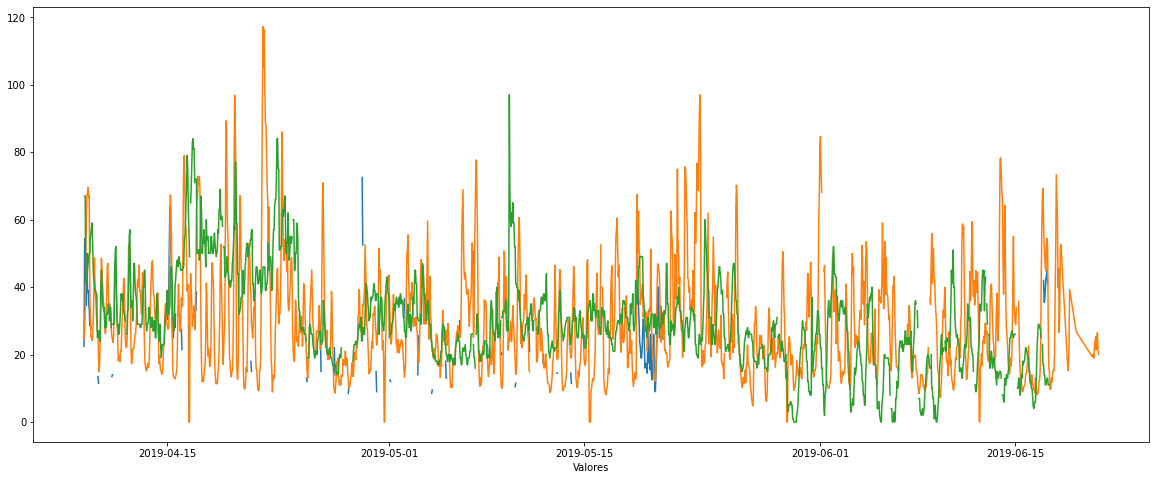

In [68]:
import matplotlib.pyplot as plt

no2_subset= no2.pivot(columns="location", values="value")

plt.figure(figsize=(20,8))

plt.xlabel("Fechas")
plt.xlabel("Valores")
plt.plot(no2_subset)

plt.show()

<AxesSubplot:xlabel='date.utc'>

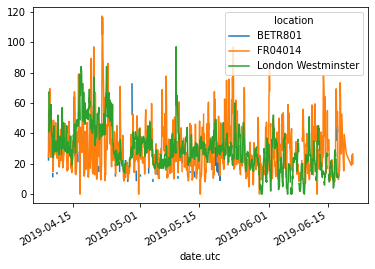

In [65]:

no2.pivot(columns="location", values="value").plot()

<div class="alert alert-block alert-info">
<b>Nota:</b> Cuando el parámetro de índice no está definido, se utiliza el índice existente (etiquetas de fila).
</div>

Para obtener más información sobre `pivot()`, consulte el siguiente enlace:

https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-reshaping

### Tablas Pivot 
<img src="https://pandas.pydata.org/docs/_images/07_pivot_table.svg" width="70%" height="70%">

Si deseamos las concentraciones medias de NO2 y PM2.5 en cada una de las estaciones en forma de tabla debemos hacer lo siguiente:

In [26]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [27]:
air_quality.pivot_table(values="value", index="location",columns="parameter", aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


En el caso de `pivot()`, los datos solo se reorganizan. Cuando es necesario agregar varios valores (en este caso específico, los valores en diferentes pasos de tiempo) se puede usar `pivot_table()`, proporcionando una función de agregación (por ejemplo, media) sobre cómo combinar estos valores.

__Tabla Pivot__ (tabla dinámica) es un concepto bien conocido en el software de hojas de cálculo. Cuando esté interesado en las columnas de resumen para cada variable también por separado, ponga el parámetro de `margin=True`:

In [28]:
air_quality.pivot_table(values="value", index="location", columns="parameter", aggfunc="mean", margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [29]:
air_quality.groupby(["parameter", "location"]).mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

Para obtener más información sobre `pivot_table()`, consulte el siguiente enlace: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot

<div class="alert alert-block alert-info">
<b>Nota:</b> En caso de que se lo pregunte, pivot_table() está directamente vinculado a groupby(). El mismo resultado puede obtenerse agrupando tanto el parámetro como la ubicación:
    <ul><li>air_quality.groupby(["parameter", "location"]).mean()</li></ul>
</div>


Para más información sobre `groupby()` en combinación con `unstack()` consulte el siguiente enlace: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-combine-with-groupby

### Formato wide to long
Comenzando de nuevo desde la tabla wide to long creada en la sección anterior:

In [71]:
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [72]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


<img src="https://pandas.pydata.org/pandas-docs/version/1.0.3/_images/07_melt1.svg" width="70%" height="70%">

Quiero recopilar todas las mediciones de NO2 de la calidad del aire en una sola columna (wide to long):

In [73]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


El método `pandas.melt()` en un `DataFrame` convierte la tabla de datos de formato ancho a formato largo. Los encabezados de columna se convierten en los nombres de las variables en una columna recién creada.

La solución es la versión corta sobre cómo aplicar `pandas.melt()`. El método fusionará todas las columnas NO mencionadas en `id_vars` en dos columnas: una columna con los nombres de los encabezados de columna y una columna con los valores en sí. La última columna obtiene por defecto el nombre `value`.

In [32]:
no_2 = no2_pivoted.melt(id_vars="date.utc",value_vars=["BETR801","FR04014","London Westminster"],value_name="NO_2",var_name="id_location")
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


El resultado en el mismo, pero definido con más detalle:

* value_vars define explícitamente qué columnas fusionar
* value_name proporciona un nombre de columna personalizado para la columna de valores en lugar del valor de nombre de columna predeterminado
* var_name proporciona un nombre de columna personalizado para la columna que recopila los nombres de encabezado de columna. De lo contrario, toma el nombre del índice o una variable predeterminada
Por lo tanto, los argumentos `value_name` y `var_name` son solo nombres definidos por el usuario para las dos columnas generadas. Las columnas a fusionar (melt) están definidas por `id_vars` y `value_vars`.

La conversión de __wide to long__ con `pandas.melt()` se explica con más detalle en el siguiente enlace: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-melt

<div class="alert alert-block alert-info">
<b>Recuerda:</b>
    <ul>
        <li>La clasificación por una o más columnas es compatible con sort_values</li>
        <li>La función pivot es puramente la reestructuración de los datos, pivot_table admite agregaciones</li>
        <li>El reverso del pivot (formato long to wide) es melt (formato wide to long)</li>
    </ul>
</div>

Una descripción completa está disponible en la guía del usuario en las páginas sobre reshaping y pivot aquí: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping

### Ejercicios

#### Tema 1
Crea un DataFrame llamado `base_tipo_autos` que contenga los elementos del archivo `base_tipo_autos.csv`. 

De esto, crear 2 DataFrames:
* Con registros donde SUMLEV sea 50
    * Después hallar el promedio por `STNAME` de la columna CENSUS2010POP. Imprimir el resultado.
* Con registros donde SUMLEV no sea 50
    * Después hallar el valor máximo y mínimo por `STNAME` de la columna CENSUS2010POP. Imprimir el resultado.

#### Tema 2
En base al DataFrame original `base_tipo_autos` crear uno nuevo de nombre `base_tipo_autos_res` con las siguientes columnas:

'STNAME',
'CTYNAME',
'BIRTHS2010',
'BIRTHS2011',
'BIRTHS2012',
'BIRTHS2013',
'BIRTHS2014',
'BIRTHS2015',
'POPESTIMATE2010',
'POPESTIMATE2011',
'POPESTIMATE2012',
'POPESTIMATE2013',
'POPESTIMATE2014',
'POPESTIMATE2015'

Luego realizar los siguientes calculos:
* Hallar el promedio por estado `STNAME` de la columna `BIRTHS2010`. Imprimir resultado.
* Contar la cantidad de ciudades `CTYNAME` por estados. Imprimir resultado.
* Por estado `STNAME`, realizar un pivot por `CTYNAME` mostrando los valores de `POPESTIMATE2015`. Imprimir resultado.
* Por estado `STNAME` como indice, realizar un pivot_table por `CTYNAME` calculando la mediana de `POPESTIMATE2015`. Al final del DataFrame se debe mostrar una fila haciendo referencia a la mediana total de los registros. Imprimir resultado.